In [10]:
import pandas as pd
import numpy as np

In [654]:
data=pd.read_csv('D:\\PythonProjects\\machine\\Machine\\P14-Part3-Classification\\Section 16 - Logistic Regression\\Python\\Social_Network_Ads.csv')

In [655]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [656]:
data=data.drop('User ID',axis=1)

In [657]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [658]:
data['Gender']=data['Gender'].map({'Male':0,'Female':1})

In [659]:
data

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [660]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [661]:
data.isnull()

,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
395,False,False,False,False
396,False,False,False,False
397,False,False,False,False
398,False,False,False,False


In [662]:
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [663]:
data['Gender'].isin([1]).count()

400

In [664]:
data['Gender'].isin([0]).count()

400

In [665]:
data.shape

(400, 4)

In [666]:
data.value_counts()

Gender  Age  EstimatedSalary  Purchased
1       41   72000            0            3
0       40   57000            0            3
1       38   50000            0            2
0       29   43000            0            2
        41   52000            0            2
                                          ..
             72000            0            1
             59000            0            1
             45000            0            1
        40   107000           1            1
1       60   108000           1            1
Length: 380, dtype: int64

In [667]:
import matplotlib.pyplot as plt

<AxesSubplot:>

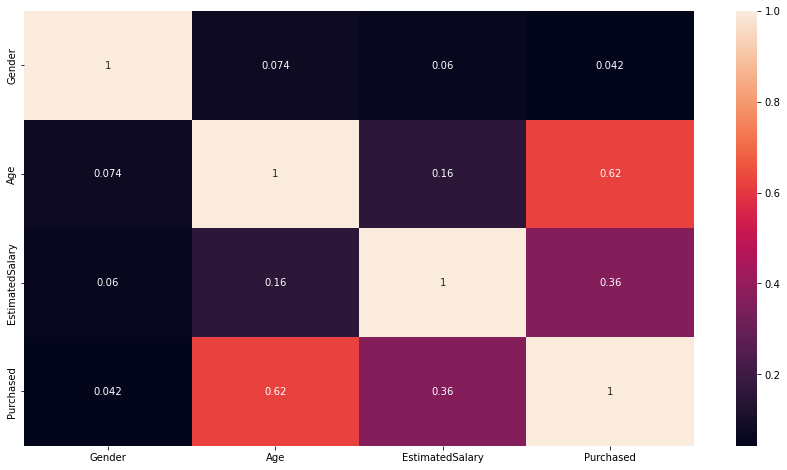

In [668]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

D:\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

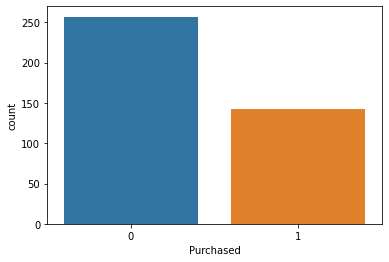

In [669]:
sns.countplot(data['Purchased'])

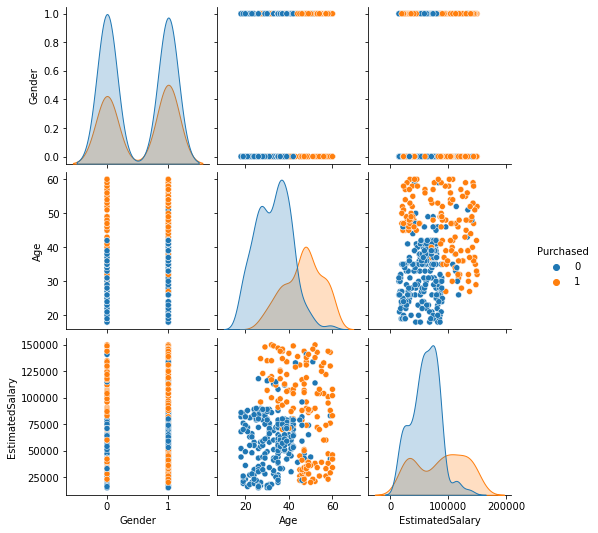

In [670]:
sns.pairplot(data,hue='Purchased')

In [671]:
data.insert(0,'Ones',1)

In [672]:
print(data)

     Ones  Gender  Age  EstimatedSalary  Purchased
0       1       0   19            19000          0
1       1       0   35            20000          0
2       1       1   26            43000          0
3       1       1   27            57000          0
4       1       0   19            76000          0
..    ...     ...  ...              ...        ...
395     1       1   46            41000          1
396     1       0   51            23000          1
397     1       1   50            20000          1
398     1       0   36            33000          0
399     1       1   49            36000          1

[400 rows x 5 columns]


In [673]:
#Scaling Data
data.iloc[:,2:-1]=data.iloc[:,1:-1]/data.iloc[:,1:-1].max()

In [674]:
data

,Ones,Gender,Age,EstimatedSalary,Purchased
0,1,0,0.0,0.316667,0
1,1,0,0.0,0.583333,0
2,1,1,1.0,0.433333,0
3,1,1,1.0,0.450000,0
4,1,0,0.0,0.316667,0
...,...,...,...,...,...
395,1,1,1.0,0.766667,1
396,1,0,0.0,0.850000,1
397,1,1,1.0,0.833333,1
398,1,0,0.0,0.600000,0


In [675]:
#Split data
X=data.iloc[:,:-1]
y=data['Purchased']

In [676]:
n_features=len(pd.DataFrame(X).columns)

In [677]:
n_features

4

In [678]:
X

,Ones,Gender,Age,EstimatedSalary
0,1,0,0.0,0.316667
1,1,0,0.0,0.583333
2,1,1,1.0,0.433333
3,1,1,1.0,0.450000
4,1,0,0.0,0.316667
...,...,...,...,...
395,1,1,1.0,0.766667
396,1,0,0.0,0.850000
397,1,1,1.0,0.833333
398,1,0,0.0,0.600000


In [679]:
def get_inital_weights():
    weights=[]
    for i in range(n_features):
        w=np.random.rand(1)
        weights.append(w)
    return weights

In [680]:
weights=get_inital_weights()

In [681]:
weights

[array([0.50191165]),
 array([0.03619721]),
 array([0.3488729]),
 array([0.35734503])]

In [682]:
def get_Z(X):
    z=np.dot(np.matrix(X),np.matrix(weights))
    return z

In [683]:
z=get_Z(X)

In [684]:
z

matrix([[0.61507091],
        [0.71036292],
        [1.04183127],
        [1.04778702],
        [0.61507091],
        [0.66271691],
        [1.04778702],
        [1.07756577],
        [0.65080541],
        [1.09543302],
        [1.04183127],
        [1.04183127],
        [0.62102666],
        [0.69249567],
        [0.60911516],
        [0.67462841],
        [0.78183192],
        [0.76992042],
        [0.77587617],
        [1.17285778],
        [0.76992042],
        [1.16690203],
        [0.78778768],
        [1.15499053],
        [0.77587617],
        [0.78183192],
        [0.79374343],
        [1.16690203],
        [0.67462841],
        [0.68653992],
        [0.68653992],
        [1.04778702],
        [1.01205252],
        [1.05374277],
        [0.66271691],
        [0.71036292],
        [1.08352152],
        [0.68058417],
        [1.04183127],
        [1.04778702],
        [1.04778702],
        [1.08352152],
        [0.71036292],
        [0.68058417],
        [1.05374277],
        [0

In [685]:
def sigmoid(z):
    return list(np.round(1/(1+np.exp(-1*z))))

In [686]:
hx=sigmoid(z)

In [687]:
hx

[matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]),
 matrix([[1.]]

In [722]:
y=y.values.tolist()

In [725]:
np.matrix(y)

matrix([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
         1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
         0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
         1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
         1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1

In [739]:
d=np.array(y)-np.array(hx)

In [746]:
d

array([[[-1., -1., -1., ...,  0., -1.,  0.]],

       [[-1., -1., -1., ...,  0., -1.,  0.]],

       [[-1., -1., -1., ...,  0., -1.,  0.]],

       ...,

       [[-1., -1., -1., ...,  0., -1.,  0.]],

       [[-1., -1., -1., ...,  0., -1.,  0.]],

       [[-1., -1., -1., ...,  0., -1.,  0.]]])

In [761]:
weights

[array([0.50191165]),
 array([0.03619721]),
 array([0.3488729]),
 array([0.35734503])]

In [764]:
#Gradient Descent
def gradient_descent(a):
    z=get_Z(X)
    gx=sigmoid(z) 
    val=np.array(gx).reshape(400,1)-np.array(y).reshape(400,1)
    sumation_part=np.sum(val)
    new_weights=weights-(a/len(data))*sumation_part
    return new_weights
        

In [765]:
weights=gradient_descent(0.1)

In [766]:
weights

array([[ 0.43766165],
       [-0.02805279],
       [ 0.2846229 ],
       [ 0.29309503]])

In [767]:
len(weights)

4

In [768]:
#Split Data into train-test-cross validation
y_test=y[321:]
y_cv=y[240:320]
y_train=y[:240]
# X
X_test=X[321:]
X_cv=X[240:320]
X_train=X[:240]

In [769]:
X_train

,Ones,Gender,Age,EstimatedSalary
0,1,0,0.0,0.316667
1,1,0,0.0,0.583333
2,1,1,1.0,0.433333
3,1,1,1.0,0.450000
4,1,0,0.0,0.316667
...,...,...,...,...
235,1,0,0.0,0.766667
236,1,0,0.0,0.666667
237,1,1,1.0,0.616667
238,1,1,1.0,0.766667


In [770]:
X_test

,Ones,Gender,Age,EstimatedSalary
321,1,1,1.0,0.883333
322,1,0,0.0,0.683333
323,1,1,1.0,0.800000
324,1,1,1.0,0.800000
325,1,1,1.0,0.683333
...,...,...,...,...
395,1,1,1.0,0.766667
396,1,0,0.0,0.850000
397,1,1,1.0,0.833333
398,1,0,0.0,0.600000


In [771]:
X_cv

,Ones,Gender,Age,EstimatedSalary
240,1,0,0.0,0.700000
241,1,0,0.0,0.633333
242,1,1,1.0,0.833333
243,1,1,1.0,0.933333
244,1,1,1.0,0.683333
...,...,...,...,...
315,1,1,1.0,0.650000
316,1,1,1.0,0.900000
317,1,0,0.0,0.583333
318,1,0,0.0,0.750000


In [772]:
pd.DataFrame(X_train).shape

(240, 4)

In [807]:
#Fit Data using squared error cost
def fit_X_train():
    m=len(X_train)
    sumation=0
    z=get_Z(X_train)
    first_part=0
    second_part=0
    gx=np.array(sigmoid(z)).reshape(240,1)
    for i in range(len(gx)):
        if gx[i]==0:
            second_part=(1-y_train[i])*np.log(1-gx[i])
        else:
            first_part=y_train[i]*np.log(gx[i])
        sumation=sumation+first_part+second_part
    cost_function=(-1/m)*sumation+(2/(2*m))*sum(weights**2)
    print(cost_function)
        

In [808]:
fit_X_train()

[0.00149687]


In [811]:
#compute test error

def test_error():
    m=len(X_test)
    sumation=0
    z=get_Z(X_test)
    first_part=0
    second_part=0
    gx=np.array(sigmoid(z)).reshape(79,1)
    for i in range(len(gx)):
        if gx[i]==0:
            second_part=(1-y_test[i])*np.log(1-gx[i])
        else:
            first_part=y_test[i]*np.log(gx[i])
        sumation=sumation+first_part+second_part
    cost_function=(-1/m)*sumation+(2/(2*m))*sum(weights**2)
    return cost_function

In [812]:
test_error_value=test_error()

In [813]:
test_error_value

array([0.00454746])

In [814]:
def cv_error():
    m=len(X_cv)
    sumation=0
    z=get_Z(X_cv)
    first_part=0
    second_part=0
    gx=np.array(sigmoid(z)).reshape(80,1)
    for i in range(len(gx)):
        if gx[i]==0:
            second_part=(1-y_cv[i])*np.log(1-gx[i])
        else:
            first_part=y_cv[i]*np.log(gx[i])
        sumation=sumation+first_part+second_part
    cost_function=(-1/m)*sumation+(2/(2*m))*sum(weights**2)
    return cost_function

In [815]:
cv_error_value=cv_error()

In [816]:
cv_error_value

array([0.00449062])